In [1]:
#画图的输入数据格式
print(type(setosa.sepal_width))

NameError: name 'setosa' is not defined

In [2]:
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series, DataFrame

In [3]:
def readPickle(filename):
    import pickle

    # reload a file to a variable
    with open(filename, 'rb') as file:
        a_dict1 =pickle.load(file)

    return a_dict1

In [4]:
dictFin = readPickle('./pkl/fingerMovementData.pkl')

In [7]:
def drawHeatmap2(x1list,y1list,x2list,y2list,title,subject):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg # mpimg 用于读取图片
    import numpy as np
    from PIL import Image
    
    #entropy for subjects from code No.18
    entropyList = {'101': 0.09388104837140317, '104': 0.08644422981008111, '105': 0.42048795886069934, '106': 0.0884247813843311, '107': 0.09938949718126859, '108': 0.42955193929863067, '109': 0.11400136418066398, '110': 0.07159482862787381, '111': 0.37703020402020215, '112': 0.4333661032000567, '113': 0.8477623736482218, '114': 0.16569842346905406, '115': 0.14508176383352211, '116': 0.20389987044909935, '117': 0.08216878428683182, '118': 0.9348212963010704, '120': 0.14687520514691, '121': 0.13562228329981185, '122': 0.3589432975860881, '123': 0.49966130482929144, '124': 0.13163021243532746, '125': 0.23166463540820387, '126': 0.09894783916999074, '127': 0.20887761166270788, '128': 0.2104299522888162, '129': 0.18321448487328662, '130': 0.2882418915477877, '131': 0.46375519144411587, '132': 0.09227883279382529, '133': 0.391177491398259}

    
    lena = Image.open('back.png')
    nplena=np.array(lena)

    #sns.set(style="None")
    
    # Set up the figure
    f, ax = plt.subplots(figsize=(10,15))
    plt.axis('off')
 
    # Add labels to the plot
    red = sns.color_palette("Reds")[-2]
    blue = sns.color_palette("Blues")[-2]
    ax.text(600, 1800, "Left hand", size=16, color='black')
    ax.text(1300, 1800, "Right hand", size=16, color='black')
    ax.text(600, 1500, "Finger-to-key mapping for Participant"+subject, size=16, color='black')
    ax.text(600, 1600, "Entropy = "+str(entropyList[subject]), size=16, color='black')
    plt.gca().invert_yaxis()

    # Draw the two density plots
    ax = sns.kdeplot(x1list, y1list,
                     cmap="Reds", shade=True, shade_lowest=False,alpha=0.7)
    ax = sns.kdeplot(x2list, y2list,
                     cmap="Blues", shade=True, shade_lowest=False,alpha=0.7)
    
    
    plt.imshow(lena, interpolation='nearest', aspect='equal') # 显示图片
    plt.savefig(title+".png")
    plt.show()

In [37]:
def drawHeatmap1(x1list,y1list,title):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg # mpimg 用于读取图片
    import numpy as np
    from PIL import Image


    
    lena = Image.open('back.png')
    nplena=np.array(lena)

    #sns.set(style="None")
    
    # Set up the figure
    f, ax = plt.subplots(figsize=(10,15))
    plt.axis('off')
 
    # Add labels to the plot
    red = sns.color_palette("Reds")[-2]
    ax.text(1300, 1800, "Right hand", size=16, color=red)
    plt.gca().invert_yaxis()
    
    # Draw the two density plots
    ax = sns.kdeplot(x1list, y1list,
                     cmap="Reds", shade=True, shade_lowest=False)
    
    plt.imshow(lena, interpolation='nearest', aspect='equal') # 显示图片
    plt.savefig(title+".png")
    plt.show()

In [9]:
#main
#双手画图程序
block = '1'

for subject in dictFin.keys():
    fingerPosX1 = []
    fingerPosY1 = []
    fingerPosX2 = []
    fingerPosY2 = []
    print(subject)
#for subject in ['101']:
    for sentence in dictFin[subject][block].keys():
        for index in range(len(dictFin[subject][block][sentence]['x1'])):
            for i in range(len(dictFin[subject][block][sentence]['x1'][index])):
                x1 = int(dictFin[subject][block][sentence]['x1'][index][i])
                y1 = int(dictFin[subject][block][sentence]['y1'][index][i])
                x2 = int(dictFin[subject][block][sentence]['x2'][index][i])
                y2 = int(dictFin[subject][block][sentence]['y2'][index][i])
                #只显示键盘上方200像素以下的finger数据点位置
                #键盘4个角落的坐标
                #(498,1840)(1940,1840)
                #(498,2760)(1940,2760)
                if x1!='' and y1!='' and 1840<float(y1)<2760 and 498<float(x1)<1940:
                    fingerPosX1.append(x1)
                    fingerPosY1.append(y1)
                if x2!='' and y2!='' and 1840<float(y2)<2760 and 498<float(x1)<1940:
                    fingerPosX2.append(x2)
                    fingerPosY2.append(y2)

    drawHeatmap2(Series(fingerPosX1),Series(fingerPosY1),Series(fingerPosX2),Series(fingerPosY2),'Heatmap for fingers '+subject+' - 2 Hand',subject)

                

101
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
120
121
122
123
124
125
126
127
128
129
130
131
132


KeyboardInterrupt: 

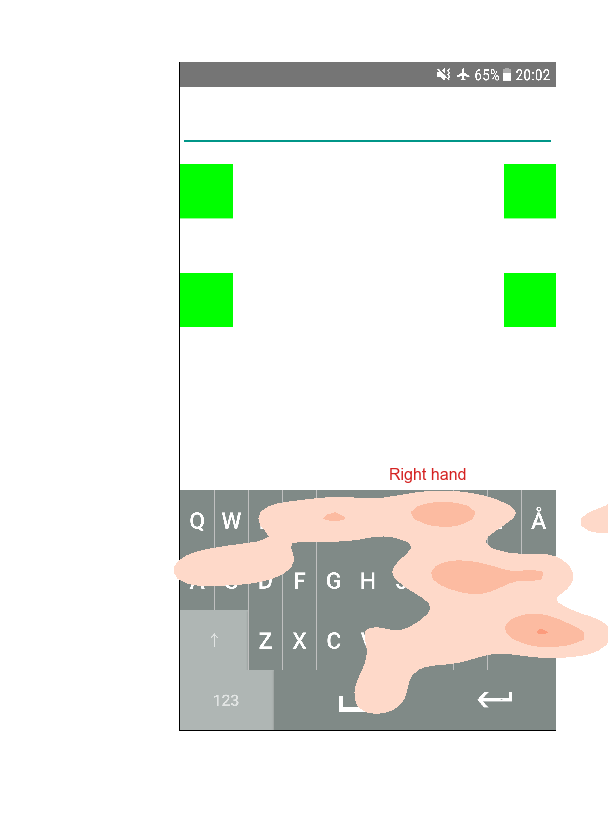

In [39]:
#单手画图程序Test
block = '2'
fingerPosX1 = []
fingerPosY1 = []
fingerPosX2 = []
fingerPosY2 = []
#for subject in dictFin.keys():
for subject in ['101']:
    for sentence in dictFin[subject][block].keys():
        for index in range(len(dictFin[subject][block][sentence]['x1'])):
            for i in range(len(dictFin[subject][block][sentence]['x1'][index])):
                x1 = int(dictFin[subject][block][sentence]['x1'][index][i])
                y1 = int(dictFin[subject][block][sentence]['y1'][index][i])
                #只显示背景图一半位置以下的finger数据点位置
                if x1!='' and y1!='' and float(y1)>1480:
                    fingerPosX1.append(x1)
                    fingerPosY1.append(y1)


drawHeatmap1(Series(fingerPosX1),Series(fingerPosY1),'Heatmap for fingers - 1 Hand')

                

In [18]:
#test 画图程序的小数据sample
x1 = [300,400,500,600]
y1 = [100,200,300,400]
x2 = [500,600,700,500]
y2 = [200,300,900,800]
drawHeatmap(Series(x1),Series(y1),Series(x2),Series(y2),'ttttttt')

ValueError: could not convert string to float: 'aspect'

In [110]:
#背景图片尺寸
import os
from PIL import Image

path = os.path.join(os.getcwd(),"back.png")
img = Image.open(path)

print (img.format)        # PNG
print (img.size)          # (3500, 3500)

PNG
(2140, 2960)


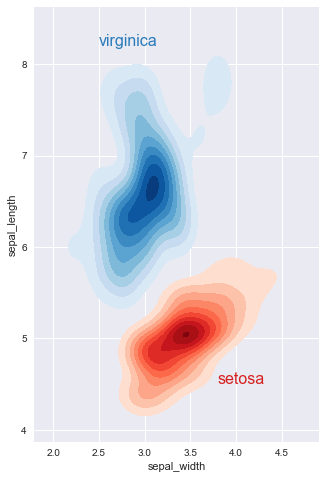

In [18]:
#Sample code
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)

plt.show()